In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# Install necessary libraries
# !pip install requests
# !pip install beautifulsoup4
# !pip install pandas
# !pip install matplotlib pandas wordcloud


In [63]:
import requests
import time

url = 'https://quotes.toscrape.com/'

def scrape_quotes(url):
    while True:
        try:
            response = requests.get(url)
            if response.status_code == 200:
                print("Verbindung erfolgreich!")
                break
            else:
                print(f"Fehler: {response.status_code}. Erneuter Versuch.")
        except requests.exceptions.RequestException as e:
            print(f"Verbindungsfehler: {e}. Erneuter Versuch...")
        time.sleep(3)

scrape_quotes(url)


Verbindung erfolgreich!


**Aufgabe 1 - Zitate von der ersten Seite extrahieren:**

In [64]:
import requests
from bs4 import BeautifulSoup
import json

# URL
url = 'https://quotes.toscrape.com/'

# Abrufen des Seiteninhalts
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [65]:
# Finden Zitate
quotes = soup.find_all('div', class_='quote')

# Liste zum Speichern
quotes_list = []

# Extrahieren Zitate und Autoren
for quote in quotes:
    text = quote.find('span', class_='text').get_text()
    author = quote.find('small', class_='author').get_text()
    tags = [tag.get_text() for tag in quote.find_all('a', class_='tag')]

    # Hinzufügen des Zitats zur Liste
    quotes_list.append({
        'quote': text,
        'author': author,
        'tags': tags
    })

In [66]:
# speichern der Zitate in einer JSON
with open('quotes_first_page.json', 'w') as f:
    json.dump(quotes_list, f, indent=4)

# extrahierten Zitate
quotes_list

[{'quote': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  'author': 'Albert Einstein',
  'tags': ['change', 'deep-thoughts', 'thinking', 'world']},
 {'quote': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  'author': 'J.K. Rowling',
  'tags': ['abilities', 'choices']},
 {'quote': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
  'author': 'Albert Einstein',
  'tags': ['inspirational', 'life', 'live', 'miracle', 'miracles']},
 {'quote': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
  'author': 'Jane Austen',
  'tags': ['aliteracy', 'books', 'classic', 'humor']},
 {'quote': "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
  'author': 'Marilyn Monroe',
  'tags': 

**Aufgabe 2 - Zitate von allen Seiten extrahieren:**

In [67]:
import requests
from bs4 import BeautifulSoup
import json

# URL der Webseite
url = 'https://quotes.toscrape.com/'

# Funktion zum Scrapen der Seite
def scrape_all_quotes(url):
    quotes_list = []

    while True:
        # Abrufen des Seiteninhalts
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Finden aller Zitate auf der Seite
        quotes = soup.find_all('div', class_='quote')

        # Extrahieren der Zitate und Autoren
        for quote in quotes:
            text = quote.find('span', class_='text').get_text()
            author = quote.find('small', class_='author').get_text()
            tags = [tag.get_text() for tag in quote.find_all('a', class_='tag')]

            quotes_list.append({
                'quote': text,
                'author': author,
                'tags': tags
            })

        # Überprüfen, ob es eine nächste Seite gibt
        next_page = soup.find('li', class_='next')
        if next_page:
            url = 'https://quotes.toscrape.com' + next_page.find('a')['href']
        else:
            break

    return quotes_list

In [68]:
all_quotes = scrape_all_quotes(url)

# Speichern der Zitate in einer JSON
with open('quotes_all_pages.json', 'w') as f:
    json.dump(all_quotes, f, indent=4)

all_quotes[:5]  # ersten 5 Zitate anzeigen

[{'quote': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  'author': 'Albert Einstein',
  'tags': ['change', 'deep-thoughts', 'thinking', 'world']},
 {'quote': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  'author': 'J.K. Rowling',
  'tags': ['abilities', 'choices']},
 {'quote': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
  'author': 'Albert Einstein',
  'tags': ['inspirational', 'life', 'live', 'miracle', 'miracles']},
 {'quote': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
  'author': 'Jane Austen',
  'tags': ['aliteracy', 'books', 'classic', 'humor']},
 {'quote': "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
  'author': 'Marilyn Monroe',
  'tags': 


> Visualisierungen



**Verteilung der Autoren und Anzahl der Zitate**

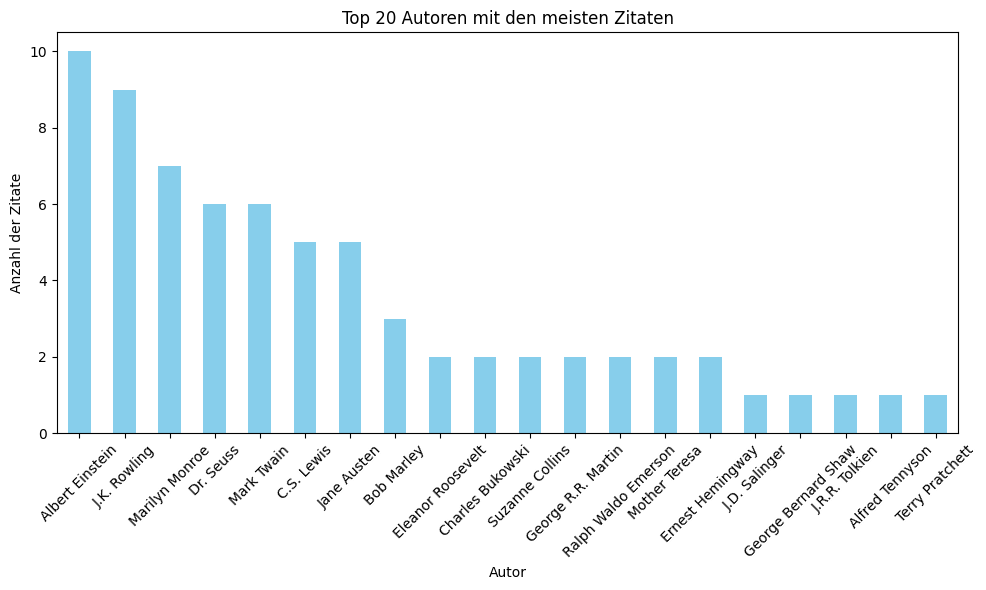

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# Laden der Zitate aus der JSON
with open('quotes_all_pages.json', 'r') as f:
    all_quotes = json.load(f)

# Umwandeln in ein DataFrame
df = pd.DataFrame(all_quotes)

# Anzahl Zitate pro Autor
author_counts = df['author'].value_counts().head(20)  # Nur die Top 20

# Balkendiagramm
plt.figure(figsize=(10,6))
author_counts.plot(kind='bar', color='skyblue')
plt.title('Top 20 Autoren mit den meisten Zitaten')
plt.xlabel('Autor')
plt.ylabel('Anzahl der Zitate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Anzahl der Zitate über die Seiten hinweg:**

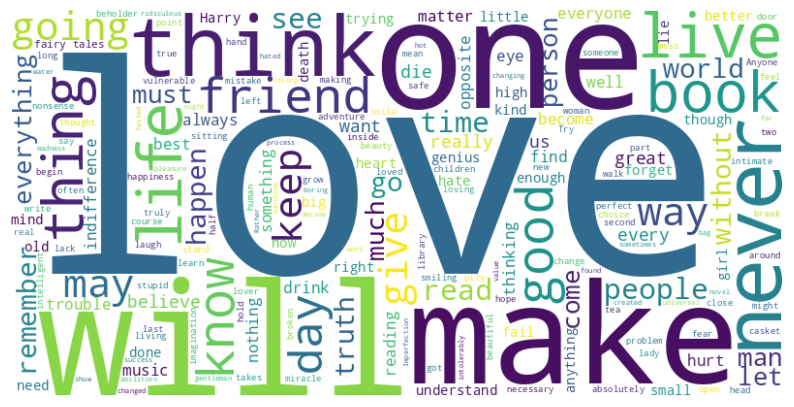

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Alle Zitate als einen Text zusammenfügen (Achtung auf Groß-/Kleinschreibung der Spalte 'Text')
all_quotes = ' '.join(df['quote'])

# Word Cloud erstellen
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_quotes)

# Visualisieren
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Speichern der Daten in einer JSON**

In [72]:
from google.colab import files

# Herunterladen JSON
# files.download('quotes_first_page.json')
# files.download('quotes_all_pages.json')
